Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


Homework report should include:  
1) scaling plot in log-log coordinates with description; create correct labels for scaling plot, including units of measurement; make comments on operations in cell starting with ##!!!  
2) replicates clusterization for all files (in directory for the lecture) with dendrogram and description;  make comments on operations in cells starting with ##!!!  

In [2]:
%%bash
pip install cooler
pip install hicrep


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 8.0 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 37.6 MB/s eta 0

In [1]:
import matplotlib.pyplot as plt

In [2]:
import cooler

In [3]:
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [7]:
dir ='/content/drive/MyDrive/bioinf/'

mcools = ['HiC1.dm3.mapq_30.1000.mcool',
          'HiC2.dm3.mapq_30.1000.mcool',
          'HiC3.dm3.mapq_30.1000.mcool',
          'HiC4.dm3.mapq_30.1000.mcool'
          ]
clrs = []

In [8]:
resolution = 20000
for mcool in mcools:
  clr = cooler.Cooler(f'{dir + mcool}::resolutions/{resolution}')
  print(mcool)
  print(clr.info)
  clrs.append(clr)


HiC1.dm3.mapq_30.1000.mcool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:39:00.281457', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7122786, 'storage-mode': 'symmetric-upper', 'sum': 63912926}
HiC2.dm3.mapq_30.1000.mcool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:16:47.610855', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7386462, 'storage-mode': 'symmetric-upper', 'sum': 61819050}
HiC3.dm3.mapq_30.1000.mcool
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:23:11.844138', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generate

In [16]:
clr.chromnames

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']

In [9]:
chrName = 'chrX'

In [10]:
balancedMatrix = clr.matrix(balance=True).fetch(chrName)

In [11]:
balancedMatrix

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.56455257,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [12]:
pixels = [clr.pixels(join=True).fetch(chrName)[:] for clr in clrs]

In [13]:
pixels

[        chrom1    start1      end1 chrom2    start2      end2  count
 6703639   chrX         0     20000   chrX         0     20000    227
 6703640   chrX         0     20000   chrX     20000     40000     53
 6703641   chrX         0     20000   chrX     40000     60000      6
 6703642   chrX         0     20000   chrX     60000     80000      1
 6703643   chrX         0     20000   chrX     80000    100000      4
 ...        ...       ...       ...    ...       ...       ...    ...
 7122780   chrX  22380000  22400000   chrX  22400000  22420000    162
 7122781   chrX  22380000  22400000   chrX  22420000  22422827     14
 7122782   chrX  22400000  22420000   chrX  22400000  22420000   1694
 7122783   chrX  22400000  22420000   chrX  22420000  22422827     27
 7122784   chrX  22420000  22422827   chrX  22420000  22422827    244
 
 [419146 rows x 7 columns],
         chrom1    start1      end1 chrom2    start2      end2  count
 6971989   chrX         0     20000   chrX         0     200

In [18]:
for mcool in mcools:
    file_path = f'{dir}{mcool}::/resolutions/{resolution}'

    !cooler dump -r 'chrX' --join $file_path >> 'output.tsv'



In [20]:
for clr in clrs:
  print(clr.bins().columns.tolist())


['chrom', 'start', 'end', 'weight']
['chrom', 'start', 'end', 'weight']
['chrom', 'start', 'end', 'weight']
['chrom', 'start', 'end', 'weight']


In [23]:
clrs[0].bins()[:]

,chrom,start,end,weight
0,chr2L,0,20000,0.015414
1,chr2L,20000,40000,0.012686
2,chr2L,40000,60000,0.017035
3,chr2L,60000,80000,0.010652
4,chr2L,80000,100000,0.010251
...,...,...,...,...
6019,chrX,22360000,22380000,0.028927
6020,chrX,22380000,22400000,0.020546
6021,chrX,22400000,22420000,0.040442
6022,chrX,22420000,22422827,NaN


То же самое для одного файла:

In [24]:
m=clr.matrix().fetch('chrX')

In [25]:
m

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.56455257,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [26]:
pix=clr.pixels()[:]

In [27]:
pix

,bin1_id,bin2_id,count
0,0,0,1
1,2,2,58
2,2,3,111
3,2,4,30
4,2,5,16
...,...,...,...
5689698,6020,6022,41
5689699,6021,6021,1872
5689700,6021,6022,39
5689701,6022,6022,207


In [26]:
bins=clr.bins()[:]

In [27]:
bins

,chrom,start,end,weight
0,chr2L,0,20000,0.015414
1,chr2L,20000,40000,0.012686
2,chr2L,40000,60000,0.017035
3,chr2L,60000,80000,0.010652
4,chr2L,80000,100000,0.010251
...,...,...,...,...
6019,chrX,22360000,22380000,0.028927
6020,chrX,22380000,22400000,0.020546
6021,chrX,22400000,22420000,0.040442
6022,chrX,22420000,22422827,NaN


<ipython-input-31-9329b9af239d>:5: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m,i))
<ipython-input-31-9329b9af239d>:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m))*20000,np.log(z))


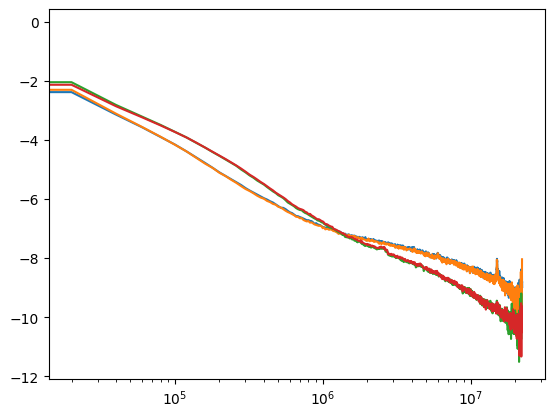

In [31]:
for clr in clrs:
  m=clr.matrix().fetch('chrX')
  z=np.zeros(len(m)) # единичная матрица
  for i in range(len(m)): # Итерация по диагоналям матриц
    z[i]=np.nanmean(np.diagonal(m,i)) # Вычисление среднего для каждой диагонали
  plt.plot(np.arange(len(m))*20000,np.log(z)) # Учитываем размер бина (20000)
  plt.xscale('log') # логорифмический масштаб

Replicates clusterization with stratum-adjusted correlation coefficient (scc)


We have replicates for 2 *drosophila* cell lines: Bg3 and Kc167.  
Bg3 - nervous cell line (HiC1...., HiC2... files)   
Kc167 - embryonic cell line  (HiC3...., HiC4... files)  
The aim is to conduct replicates clusterization, using scc and demonstrate  that replicates of same cell line tend to be closer to each other comparing with different cell types.    
Hicrep can only calculate scc for each chromosome separately.  
This is why you obtain several values with hicrepSCC function (run code below). The number of the values is equal to the number of chromosomes in cool file. So lets imagine, you take 2 mcool (or cool) files and decide to calculate scc between Hi-C matrices storing in these files only for chromosome 'chr2L', than for 'chr2R', etc. You will obtain as many scc as there are chromosomes in the Hi-C map. This is exactly what hicrepSCC function gives as an output. But then, to get single general scc value for 2 Hi-C maps (2 replicates) you should calculate average value of scc across all the chromosomes.   
So you have an scc (averaged across chrs) for each pair of samples (HiC1-HiC2,HiC1-HiC3,HiC1-HiC4,HiC2-HiC3,HiC2-HiC4,HiC3-HiC4). Now you can use these values as the measure of similarity between each 2 samples and build a dendrogram.  
To do this, you should construct symmetric matrix of similarity from calculated SCCs with ones on the diagonal.
This matrix should be used as an input for 'linkage' function (see below)

In [ ]:
### the code is for calculation of scc between HiC1.dm3.mapq_30.1000.mcool and HiC2.dm3.mapq_30.1000.mcool
##!!! describe the next four parameter (as comments)

binSize = 7000000
dBPMax = 8000000
bDownSample = True
h=0

fmcool1 = dir + 'HiC1.dm3.mapq_30.1000.mcool'
fmcool2 = dir + 'HiC2.dm3.mapq_30.1000.mcool'
cool1, binSize1 = readMcool(fmcool1, binSize)
cool2, binSize2 = readMcool(fmcool2, binSize)
scc=hicrepSCC(cool1, cool2, h, dBPMax, bDownSample)



/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert (cool1.chroms()[:] == cool2.chroms()[:]).all()[0],\
/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:91: RuntimeWarning: invalid value encountered in scalar divide
  return rhoNan2Zero @ wsNan2Zero / wsNan2Zero.sum()


array([0.6139498 , 0.57667729, 0.76396964, 0.57311631, 0.88925231,
       0.62139663,        nan])

0.6720139214615076

In [ ]:
clr.chromnames

['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX', 'chrM']

In [ ]:
sccSub = hicrepSCC(cool1, cool2, h, dBPMax, bDownSample, np.array(['chr2L', 'chr2R'], dtype=str))


/usr/local/lib/python3.10/site-packages/hicrep/hicrep.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  assert (cool1.chroms()[:] == cool2.chroms()[:]).all()[0],\


In [ ]:
sccSub

array([0.61761539, 0.57577044])